<a href="https://colab.research.google.com/github/theSC0RP/PyTorch-Deep-Learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [38]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [35]:
testset.data.shape

torch.Size([10000, 28, 28])

In [0]:
images, labels = next(iter(trainloader))

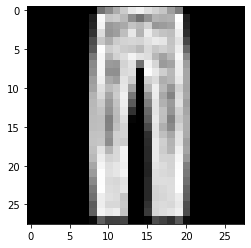

In [16]:
import matplotlib.pyplot as plt
plt.imshow(images[63][0], 'gray')

In [0]:
from torch import nn
from torch.nn import Conv2d, MaxPool2d, ReLU, LogSoftmax, Linear

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = Conv2d(1, 8, kernel_size=3, padding = 1)
    self.conv2 = Conv2d(8, 16, kernel_size=3, padding=1)
    self.pool = MaxPool2d(2)

    self.relu = ReLU()
    
    self.fc1 = Linear(7*7*16, 128)
    self.fc2 = Linear(128, 64)
    self.output = Linear(64, 10)

    self.log_softmax = LogSoftmax(1)

  def forward(self, x):
    # Convolution layers
    x = self.pool(self.relu(self.conv1(x)))
    x = self.pool(self.relu(self.conv2(x)))

    # Flatten
    x = x.view(-1, 16 * 7 * 7)

    # Fully Connected Layers
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.log_softmax(self.output(x))

    return x

In [0]:
model = CNN()

In [0]:
num_epochs = 30
learning_rate = 0.003

criterion = torch.nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

In [20]:
# TRAINING THE CNN

for e in range(num_epochs):
  correct = 0
  training_loss = 0
  for i, (images, labels) in enumerate(trainloader):
    
    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    (max_vals, arg_maxs) = torch.max(outputs.data, dim=1)
    correct += torch.sum(labels == arg_maxs)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    training_loss += loss
  print("{}/{} ----> loss = {:.3f}, accuracy = {:.2f}%".format(e+1, num_epochs, training_loss/len(trainloader), correct/600.0))

1/30 ----> loss = 2.170, accuracy = 36.97%
2/30 ----> loss = 0.938, accuracy = 68.71%
3/30 ----> loss = 0.672, accuracy = 75.06%
4/30 ----> loss = 0.628, accuracy = 76.68%
5/30 ----> loss = 0.597, accuracy = 77.98%
6/30 ----> loss = 0.574, accuracy = 78.73%
7/30 ----> loss = 0.553, accuracy = 79.52%
8/30 ----> loss = 0.534, accuracy = 80.34%
9/30 ----> loss = 0.518, accuracy = 80.82%
10/30 ----> loss = 0.502, accuracy = 81.40%
11/30 ----> loss = 0.488, accuracy = 82.04%
12/30 ----> loss = 0.473, accuracy = 82.46%
13/30 ----> loss = 0.461, accuracy = 82.83%
14/30 ----> loss = 0.450, accuracy = 83.39%
15/30 ----> loss = 0.441, accuracy = 83.76%
16/30 ----> loss = 0.430, accuracy = 84.18%
17/30 ----> loss = 0.421, accuracy = 84.44%
18/30 ----> loss = 0.414, accuracy = 84.72%
19/30 ----> loss = 0.405, accuracy = 85.11%
20/30 ----> loss = 0.396, accuracy = 85.54%
21/30 ----> loss = 0.391, accuracy = 85.59%
22/30 ----> loss = 0.386, accuracy = 85.83%
23/30 ----> loss = 0.378, accuracy = 86.0

In [40]:
# TESTING THE CNN
with torch.no_grad():
  correct = 0
  for i, (images, labels) in enumerate(testloader):
    outputs = model(images)
    loss = criterion(outputs, labels)
    
    (max_vals, arg_maxs) = torch.max(outputs.data, dim = 1)
    correct += torch.sum(arg_maxs == labels)
  print("Accuracy: {:.2f} %".format(correct / 100))

Accuracy: 86.00 %
